In [56]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# GOAL:
- To make an accurate model that can accurately predict house price, given certain features. 

## Exploring the Dataset

In [57]:
# Better format display:
pd.set_option("display.max_columns",None)
pd.set_option("display.width",1000)
pd.set_option("display.max_rows",None)

# Load csv as data frame
ds =  pd.read_csv("./data/Housing.csv")

# Displaying 
print("Columns:")
print(ds.columns + "\n")
print("First 5 Rows:")
print(ds.head(5))

Columns:
Index(['price\n', 'area\n', 'bedrooms\n', 'bathrooms\n', 'stories\n', 'mainroad\n', 'guestroom\n', 'basement\n', 'hotwaterheating\n', 'airconditioning\n', 'parking\n', 'prefarea\n', 'furnishingstatus\n'], dtype='object')
First 5 Rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement hotwaterheating airconditioning  parking prefarea furnishingstatus
0  13300000  7420         4          2        3      yes        no       no              no             yes        2      yes        furnished
1  12250000  8960         4          4        4      yes        no       no              no             yes        3       no        furnished
2  12250000  9960         3          2        2      yes        no      yes              no              no        2      yes   semi-furnished
3  12215000  7500         4          2        2      yes        no      yes              no             yes        3      yes        furnished
4  11410000  7420         4          1   

### Numerical Features
- Price
- Area
- Bedrooms
- Bathrooms
- Stories
- Parking Spots

### Categorical Features
- Main Road
- Guest Room
- Basement 
- Hot Water Heater
- Prefarea (Prefered Area)
- Air Conditioner


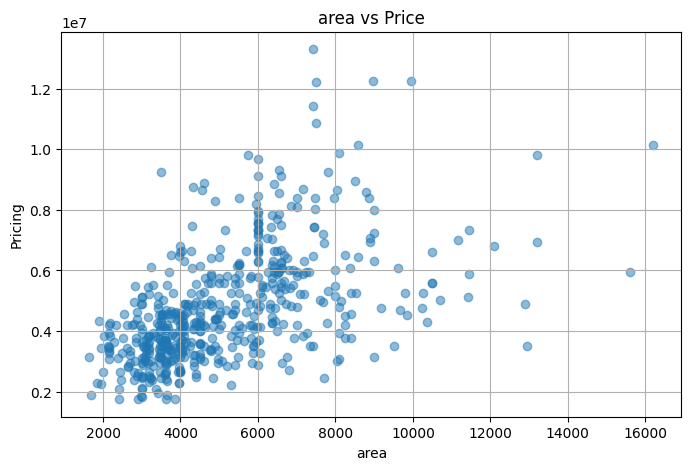

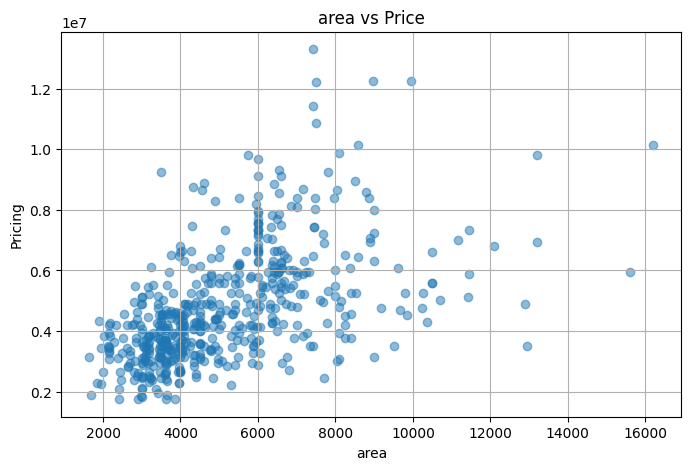

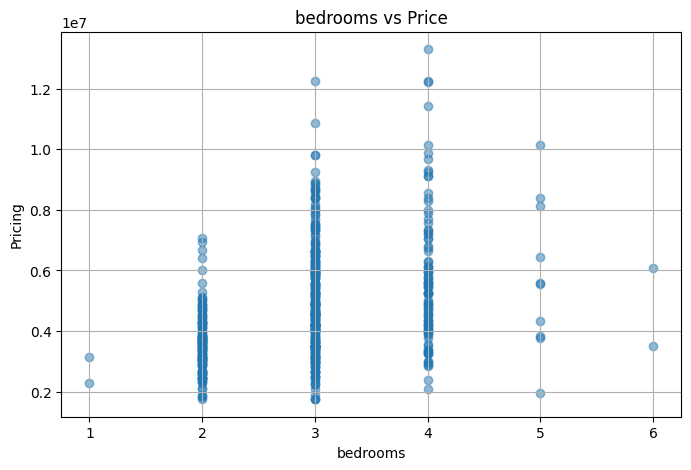

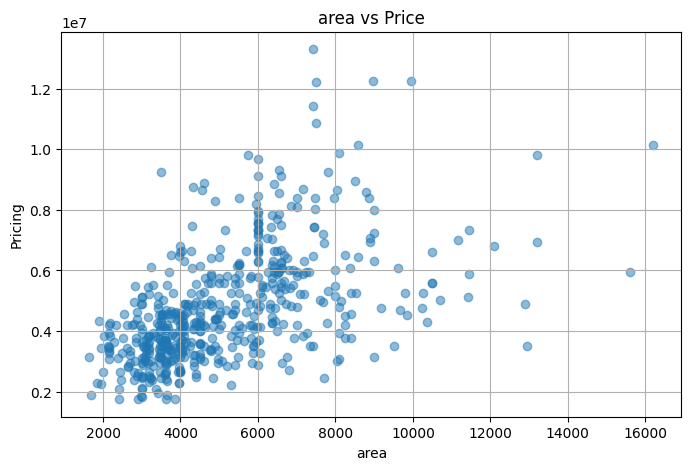

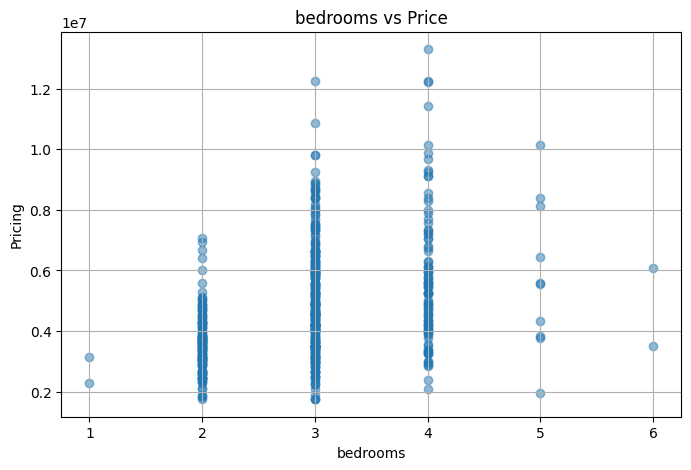

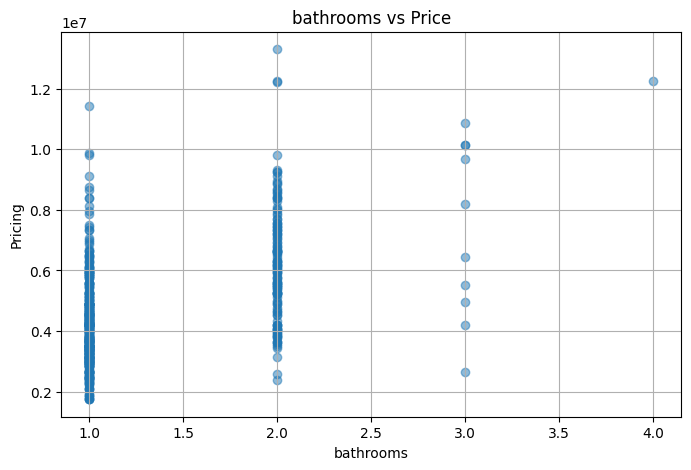

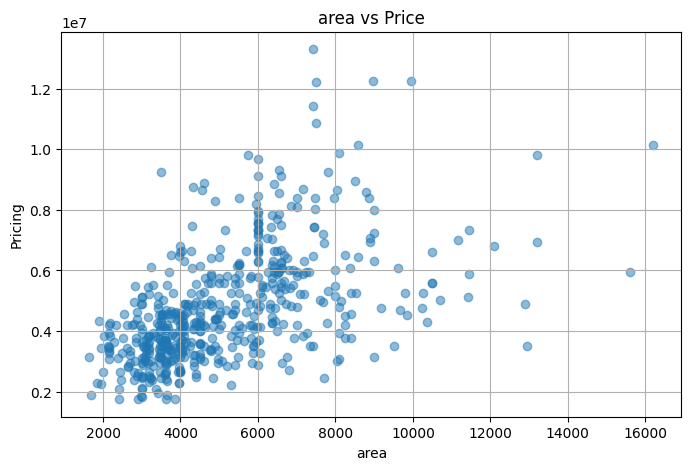

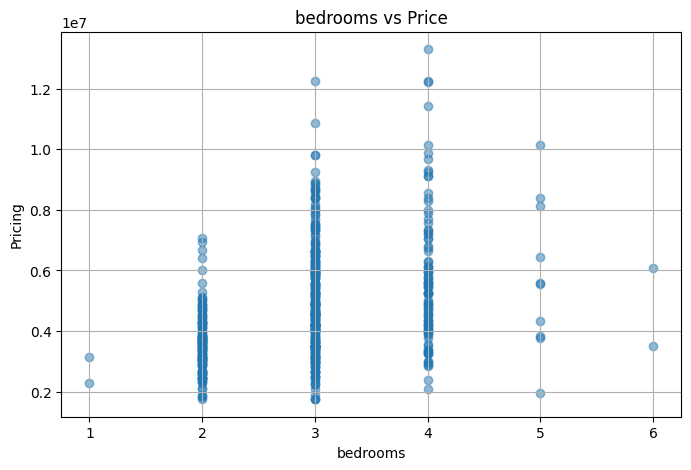

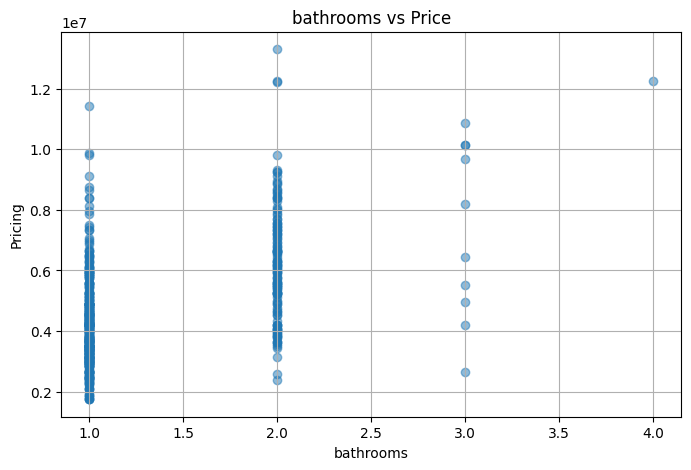

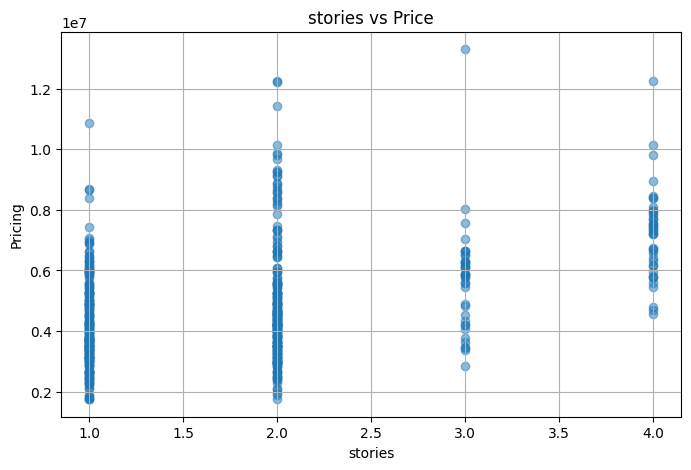

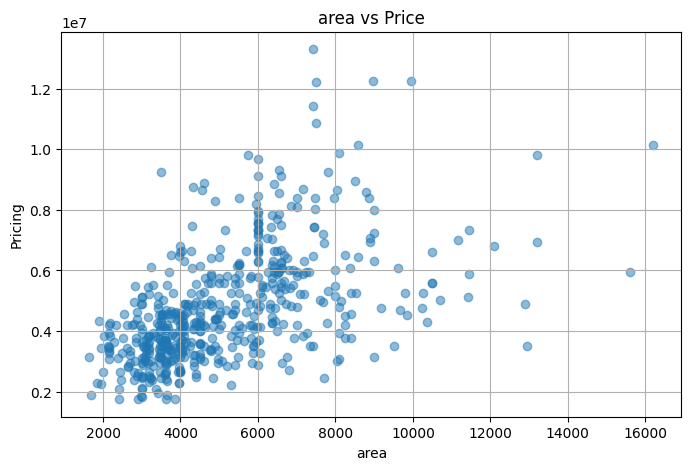

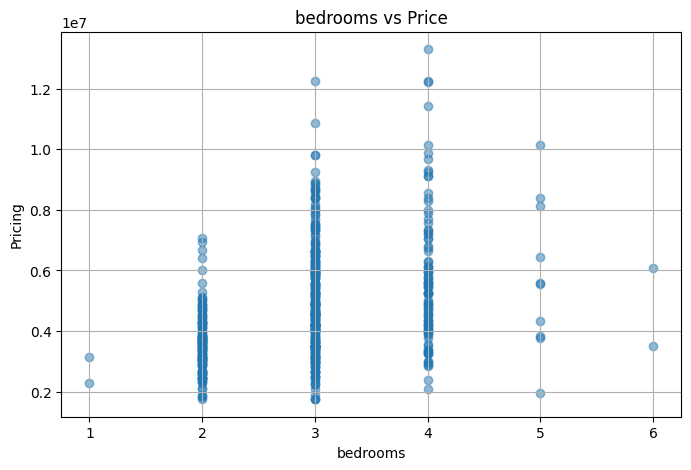

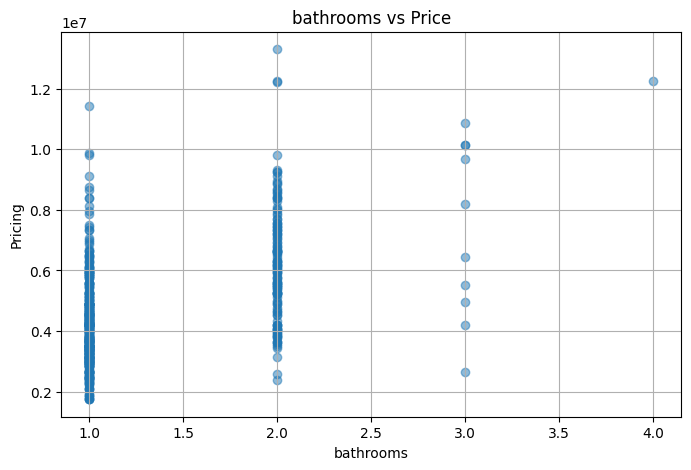

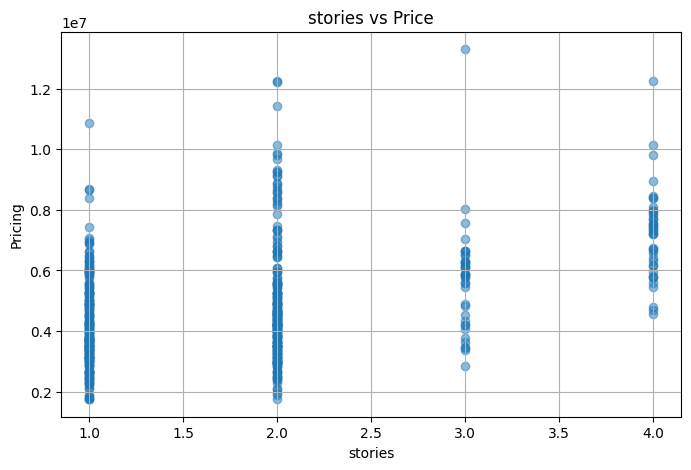

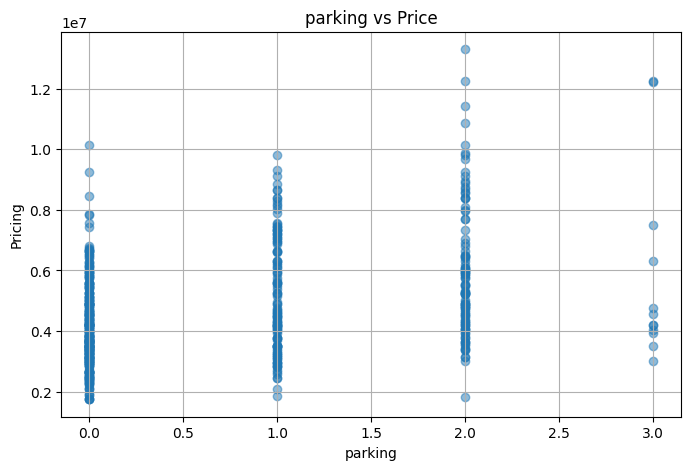

In [58]:
numerical_feature = ["area","bedrooms","bathrooms","stories","parking"]
categorical_feature = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","furnishingstatus"]
y = ds.iloc[:,0]
# Ploting numerical Feature
for feature in numerical_feature:
    plt.figure(figsize=(8,5))
    plt.scatter(ds[feature],y,alpha=0.5)
    plt.title(f"{feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Pricing")
    plt.grid(True)
    plt.show()

- noted we can somewhat see a positive trend as area increase so those prices.


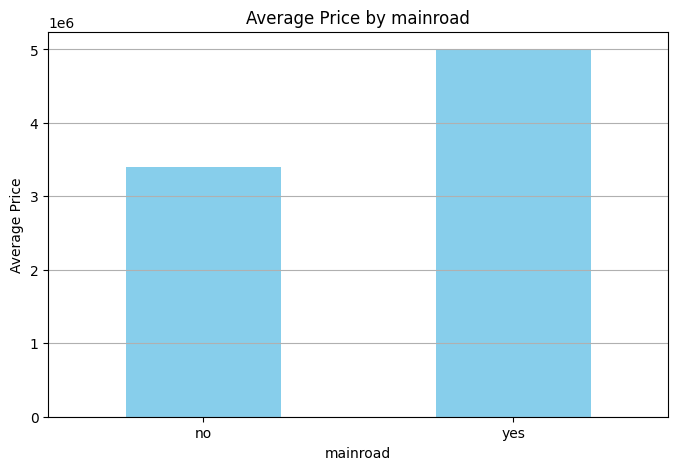

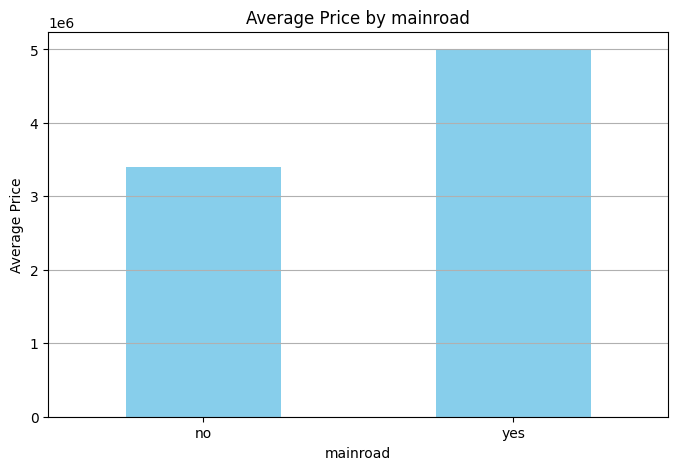

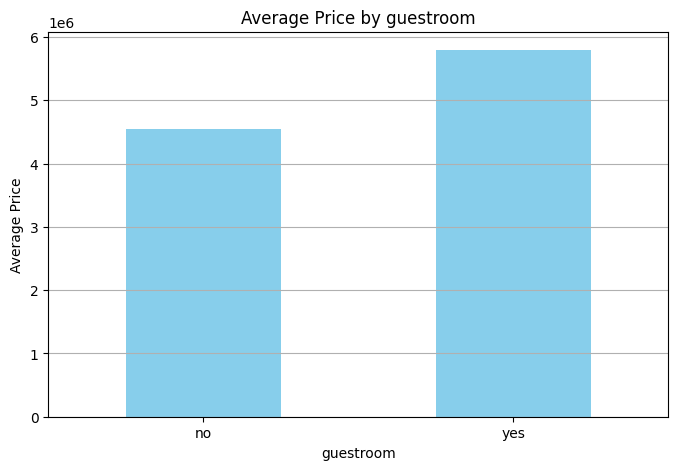

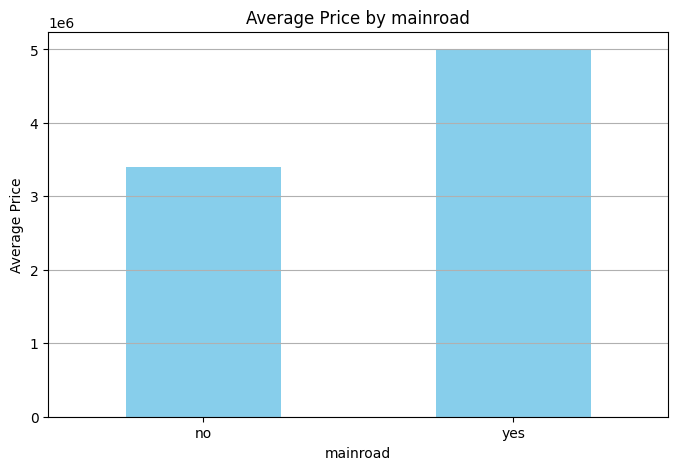

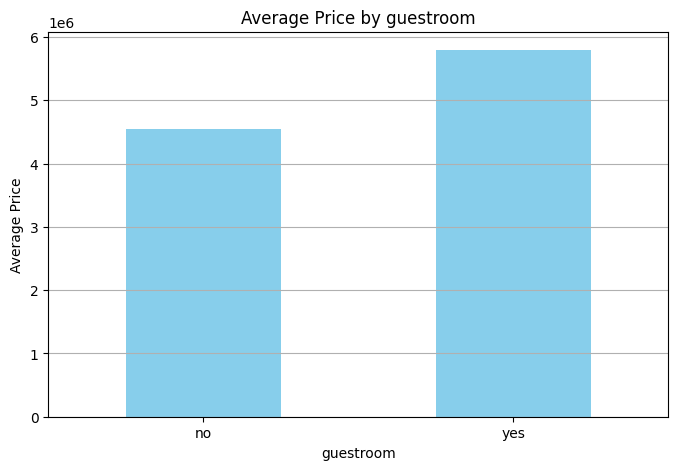

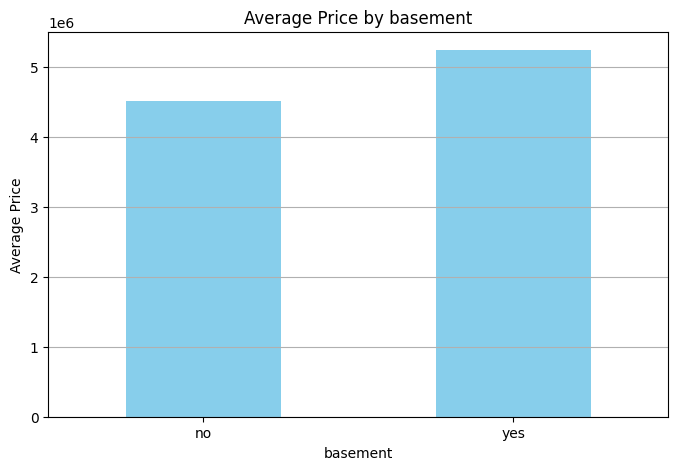

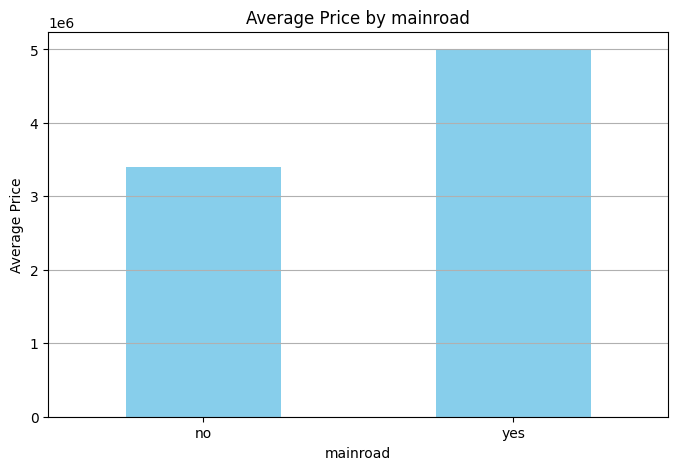

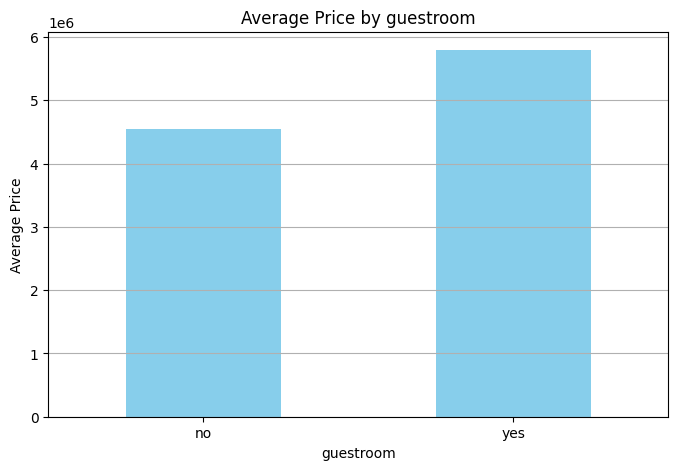

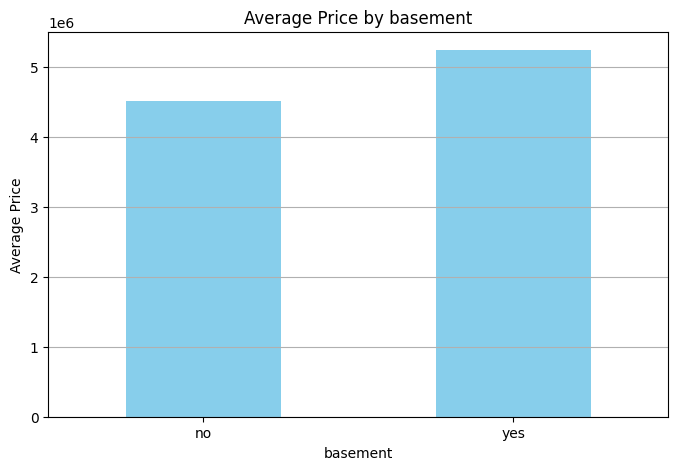

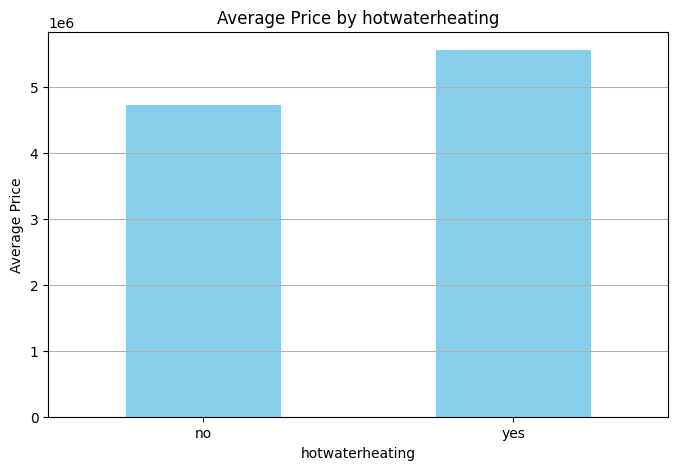

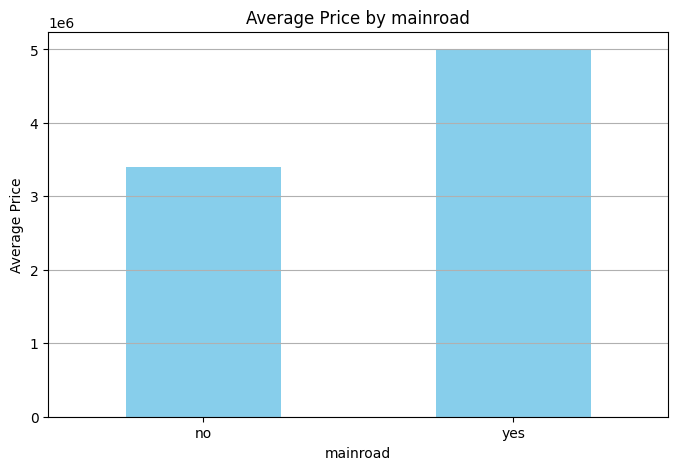

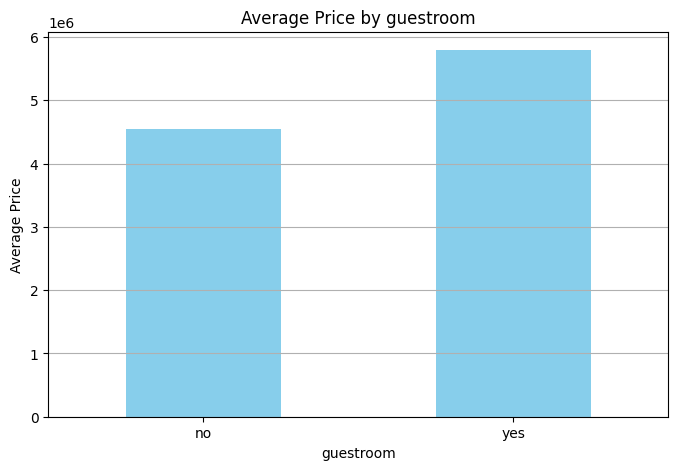

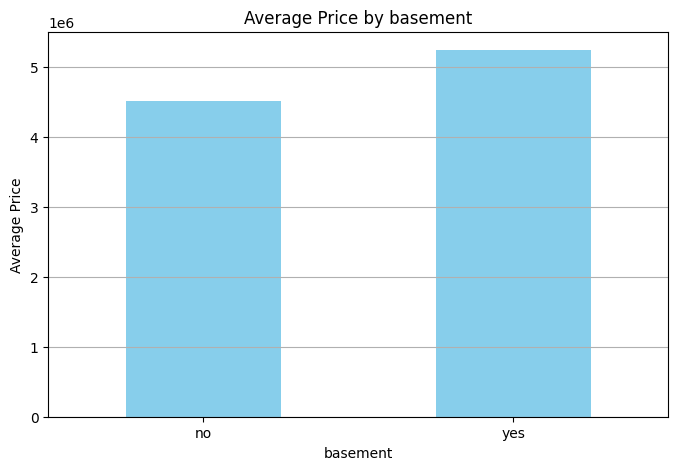

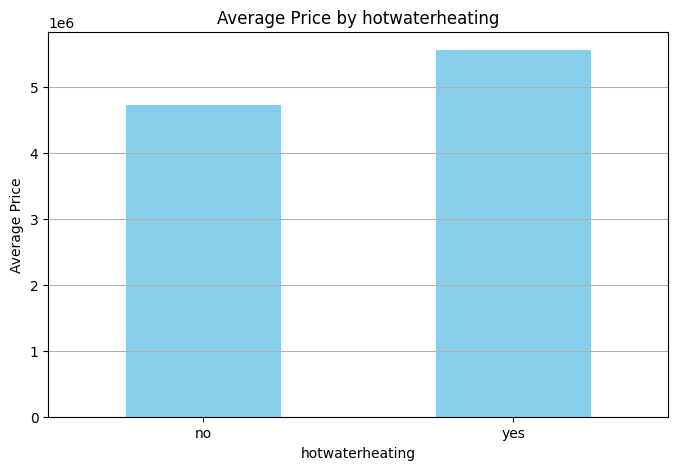

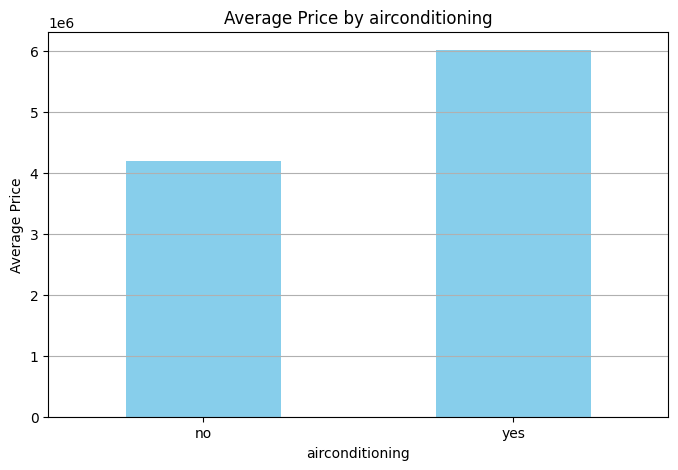

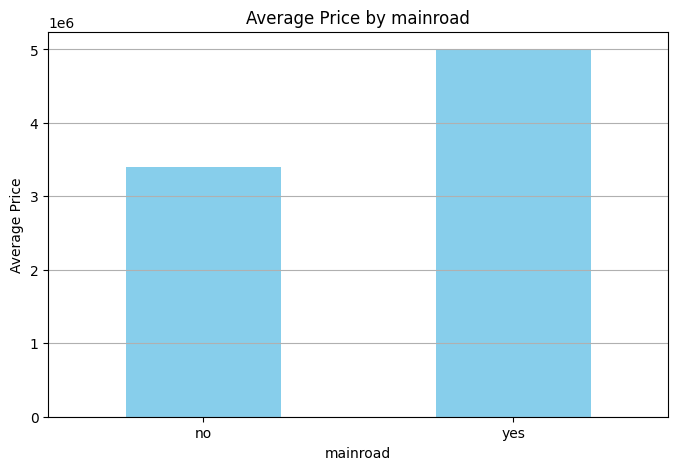

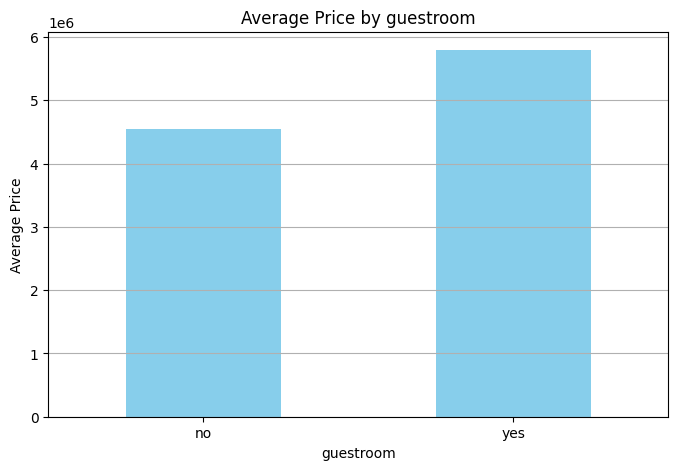

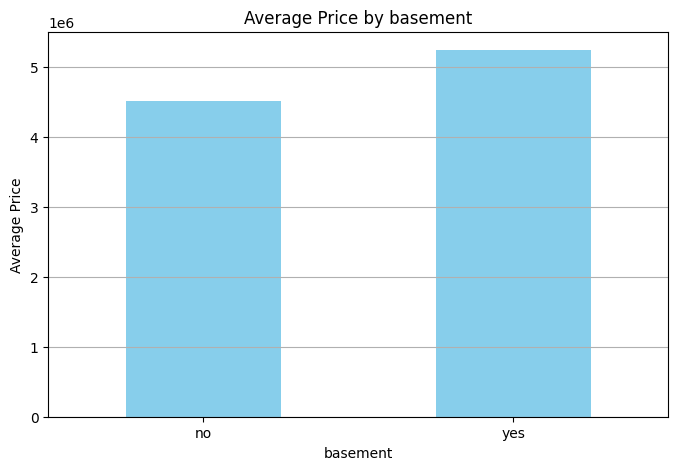

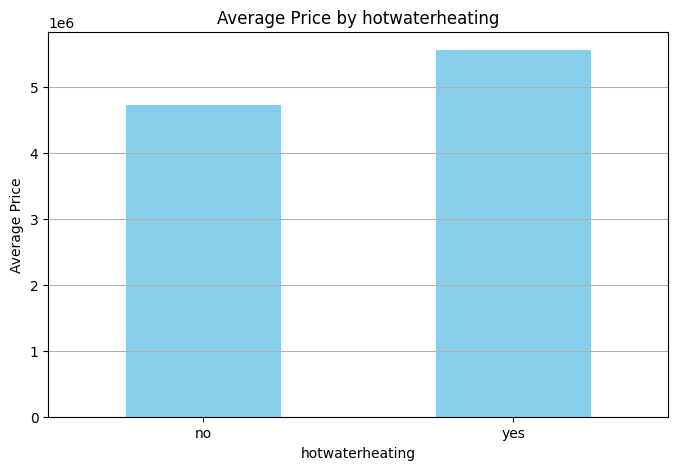

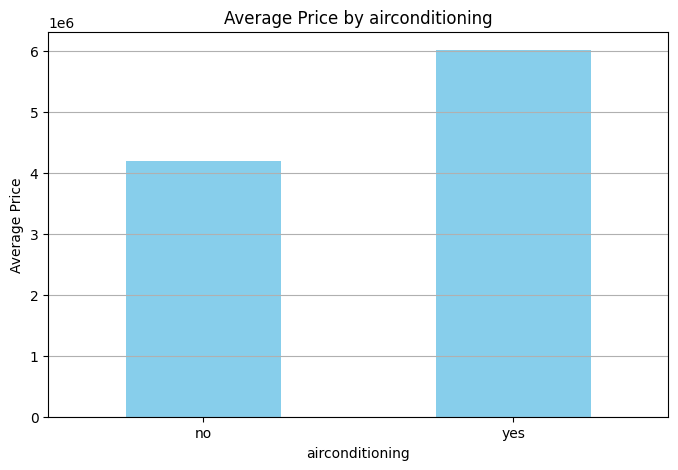

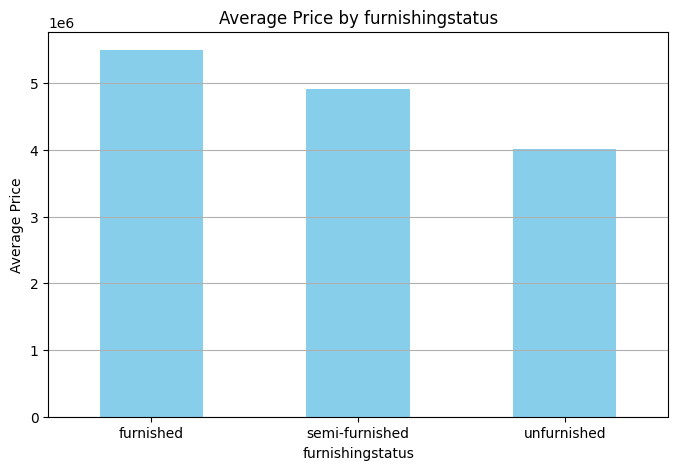

In [59]:
for column in categorical_feature:
    plt.figure(figsize=(8,5))
    grouped_data = ds.groupby(column)['price'].mean()
    grouped_data.plot(kind="bar", color="skyblue")
    plt.title(f"Average Price by {column}")
    plt.xlabel(column)
    plt.ylabel("Average Price")
    plt.xticks(rotation=0)
    plt.grid(axis="y")
    plt.show()

In [60]:
# Encoding Data set

from sklearn.preprocessing import LabelEncoder
print("Original values in furnishingstatus:")
print(ds['furnishingstatus'].unique())

le = LabelEncoder()
columns_to_encode = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
for column in columns_to_encode:
    ds[column] = le.fit_transform(ds[column])
print("Original values in furnishingstatus:")
print(ds['furnishingstatus'].unique())
ds.head(10)

Original values in furnishingstatus:
['furnished' 'semi-furnished' 'unfurnished']
Original values in furnishingstatus:
[0 1 2]


Original values in furnishingstatus:
['furnished' 'semi-furnished' 'unfurnished']
Original values in furnishingstatus:
[0 1 2]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


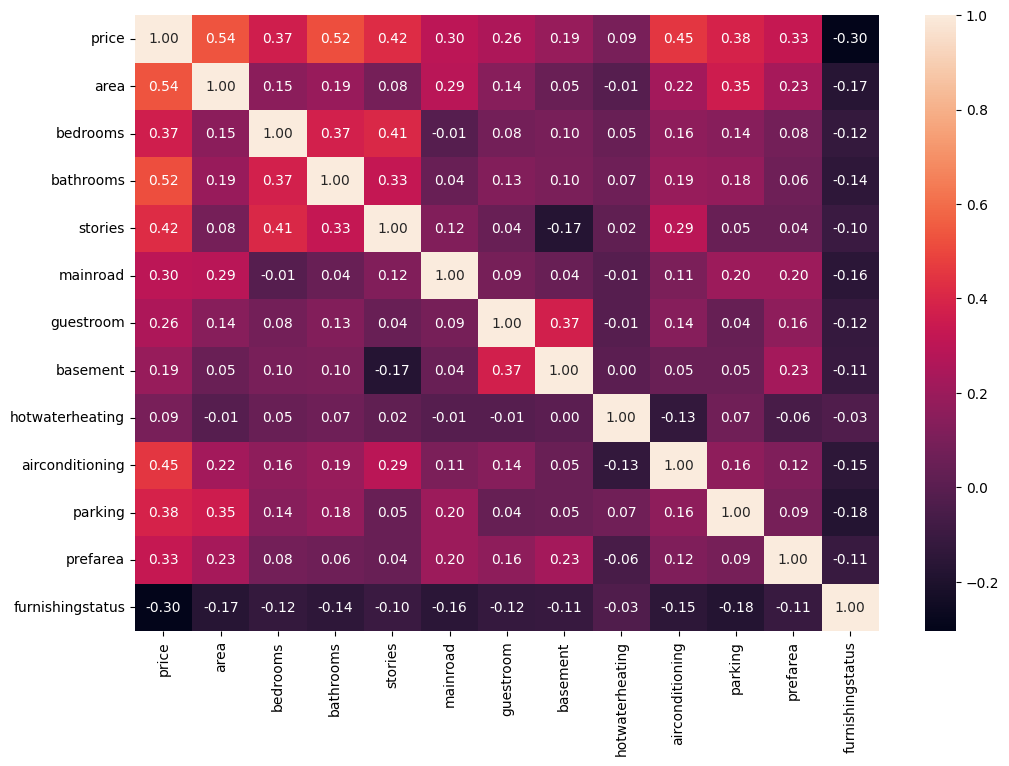

In [61]:
# Correlation 
plt.figure(figsize=(12,8))
sns.heatmap(ds.corr(),annot=True, fmt=".2f")
plt.show()


- Moderate Positive correlation noted:
    - Price and Area
    - Price and Bathroom
    - Price and Stories
    - Price and Main Road
    - Price and Air Conditioning
    - Price and Parking
    - Price and Prefered Area
    - Area and Parking
    - Bedroom and Bathroom
    - Bedroom and Stories
    - Bathroom and Stories 
    - Guestroom and basement
- Moderate Negative correlation noted:
    - Price and Furnishing status, as furnish -> Semi -> None, price decreases


In [62]:
correlation_matrix = ds.corr()
significant_features = correlation_matrix['price'][abs(correlation_matrix['price']) > 0.4]
significant_features = significant_features.drop('price', errors='ignore')
print(significant_features.index)
print(ds[significant_features.index])

Index(['area', 'bathrooms', 'stories', 'airconditioning'], dtype='object')
      area  bathrooms  stories  airconditioning
0     7420          2        3                1
1     8960          4        4                1
2     9960          2        2                0
3     7500          2        2                1
4     7420          1        2                1
5     7500          3        1                1
6     8580          3        4                1
7    16200          3        2                0
8     8100          1        2                1
9     5750          2        4                1
10   13200          1        2                1
11    6000          3        2                0
12    6550          2        2                1
13    3500          2        2                0
14    7800          2        2                0
15    6000          1        2                0
16    6600          2        2                1
17    8500          2        4                1
18    4600   

### Intitial Training of Model


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

sc = StandardScaler()
# Lets try a baseline using all features 
x = ds.iloc[:,1:]
y = ds["price"]

# Split into training and testing sets

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

# Standardization of Data
x_train["area"] = sc.fit_transform(x_train[["area"]])
x_test["area"] = sc.transform(x_test[["area"]])

print(x_train)

         area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  hotwaterheating  airconditioning  parking  prefarea  furnishingstatus
134  0.882768         3          1        1         1          0         1                0                0        2         1                 1
340  0.087836         5          2        2         1          0         0                0                0        0         0                 1
426 -1.127943         3          1        1         0          0         0                0                0        0         0                 0
18  -0.239489         3          2        2         1          1         0                0                1        2         0                 0
36   1.108155         3          2        3         1          0         0                1                0        1         1                 0
296 -0.239489         3          2        2         1          0         0                0                1        1       

In [68]:

linearRegressionModel = LinearRegression()
linearRegressionModel.fit(x_train,y_train)

acc_log_train = round(linearRegressionModel.score(x_train, y_train) * 100, 2)
acc_log_test = round(linearRegressionModel.score(x_test, y_test) * 100, 2)
gap = round(acc_log_train - acc_log_test)
print("Training Accuracy (R²): % {}".format(acc_log_train))
print("Test Accuracy (R²): % {}".format(acc_log_test))
print("Gap: {}".format(gap))


Training Accuracy (R²): % 68.29
Test Accuracy (R²): % 65.27
Gap: 3


- With the all features used (except price), the baseline accuracy was 68% using a linear regression model.

### Comparing Other Models 
- Polynomial Linear Regression
- Support Vector Regression
- Decision tree Regression
- Random Forest Regression


In [70]:
# Model Import
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Polynomial Model:

poly_model = PolynomialFeatures(degree=2)
x_poly = poly_model.fit_transform(x_train)
x_poly_test = poly_model.transform(x_test)

linearRegressionModel2 = LinearRegression()
linearRegressionModel2.fit(x_poly,y_train)

acc_log_train = round(linearRegressionModel2.score(x_poly, y_train) * 100, 2)
acc_log_test = round(linearRegressionModel2.score(x_poly_test, y_test) * 100, 2)

gap = round(acc_log_train - acc_log_test)
print("Training Accuracy (R²): % {}".format(acc_log_train))
print("Test Accuracy (R²): % {}".format(acc_log_test))
print("Gap: {}".format(gap))


Training Accuracy (R²): % 77.69
Test Accuracy (R²): % 62.06
Gap: 16


In [71]:
# SVR MODEL
svr_model = SVR(kernel="rbf")
svr_model.fit(x_train,y_train)

acc_log_train = round(svr_model.score(x_train, y_train) * 100, 2)
acc_log_test = round(svr_model.score(x_test, y_test) * 100, 2)

gap = round(acc_log_train - acc_log_test)
print("Training Accuracy (R²): % {}".format(acc_log_train))
print("Test Accuracy (R²): % {}".format(acc_log_test))
print("Gap: {}".format(gap))

Training Accuracy (R²): % -5.3
Test Accuracy (R²): % -15.38
Gap: 10


In [72]:
# Decision Tree Regression
decisionReg_model = DecisionTreeRegressor(random_state=42)
decisionReg_model.fit(x_train,y_train)

acc_log_train = round(decisionReg_model.score(x_train, y_train) * 100, 2)
acc_log_test = round(decisionReg_model.score(x_test, y_test) * 100, 2)

gap = round(acc_log_train - acc_log_test)
print("Training Accuracy (R²): % {}".format(acc_log_train))
print("Test Accuracy (R²): % {}".format(acc_log_test))
print("Gap: {}".format(gap))


Training Accuracy (R²): % 99.88
Test Accuracy (R²): % 12.9
Gap: 87


In [73]:
# Random Forest Reggression 
randForestReg = RandomForestRegressor(n_estimators = 10, random_state = 0)
randForestReg.fit(x_train,y_train)

acc_log_train = round(randForestReg.score(x_train, y_train) * 100, 2)
acc_log_test = round(randForestReg.score(x_test, y_test) * 100, 2)

gap = round(acc_log_train - acc_log_test)
print("Training Accuracy (R²): % {}".format(acc_log_train))
print("Test Accuracy (R²): % {}".format(acc_log_test))
print("Gap: {}".format(gap))


Training Accuracy (R²): % 93.33
Test Accuracy (R²): % 50.57
Gap: 43


# Conclusion So Far:
- Linear Regression has best overal model accuracy due to low gap between the training and test accuracy.
- Next step is to try and do some feature engineering to hopefully bring 